In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load data
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target.shape

(569,)

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [11]:
N, D = X_train.shape

In [12]:
N

381

In [13]:
D

30

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Lets start with TensorFlow
# Lets build the model
# There are 2 ways of building a model:
# WAY 1:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(D,)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# WAY 2:
model = tf.keras.models.Sequential() # standard line, Sequential layer is like a placeholder
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [16]:
# Call compile() wherein we pass optimizer as 'adam' and  loss as 'binary_crossentropy' and 'accuracy' as the metric
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
# Train the model for 100 epochs i.e. 100 times
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100)
# Evaluate the model
print("Train score:",model.evaluate(X_train,y_train))
print("Test score:",model.evaluate(X_test,y_test)) # Output is in the form (loss,accuracy)

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 1.1347 - accuracy: 0.3228 - val_loss: 1.0925 - val_accuracy: 0.3564
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0232 - accuracy: 0.3727 - val_loss: 0.9946 - val_accuracy: 0.3883
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9245 - accuracy: 0.4436 - val_loss: 0.9047 - val_accuracy: 0.4628
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8359 - accuracy: 0.5013 - val_loss: 0.8242 - val_accuracy: 0.5106
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7551 - accuracy: 0.5643 - val_loss: 0.7566 - val_accuracy: 0.5479
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.6168 - val_loss: 0.6968 - val_accuracy: 0.6223
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6745 - val_loss: 0.6476 - val_accuracy: 0.6489
Epoch 8/100


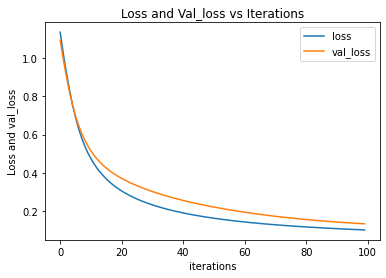

In [18]:
# model.fit() return an object 'r' that contain the data from the training process
# Lets plot the Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations")
plt.xlabel('iterations')
plt.ylabel('Loss and val_loss')
plt.legend();

Observation:
There is a steady decrease in the loss per iteration as expected.

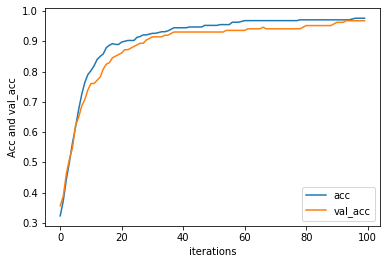

In [20]:
# Plotting the accuracy
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.xlabel('iterations')
plt.ylabel('Acc and val_acc')
plt.legend();

Observation: We see a steady increae in the accuracy at each iteration.

In [21]:
# Making Predictions
y_pred = model.predict(X_test)
print(y_pred) # The outputs are of sigmoid i.e between 0 or 1
# The sigmoid has to be interpreted as probabilities p(y=1|x)

[[9.08305645e-01]
 [1.55631471e-06]
 [9.97429430e-01]
 [8.93852115e-03]
 [7.47136354e-01]
 [5.88371634e-01]
 [5.98178190e-07]
 [1.48217499e-01]
 [9.99515295e-01]
 [8.44269395e-01]
 [8.78278613e-01]
 [9.90903258e-01]
 [1.21793151e-03]
 [9.57190990e-04]
 [7.90327668e-01]
 [9.88347411e-01]
 [5.68082273e-01]
 [9.77841139e-01]
 [9.49775040e-01]
 [9.94190395e-01]
 [9.92520452e-01]
 [2.41637230e-04]
 [5.02027452e-01]
 [9.70967293e-01]
 [9.39418912e-01]
 [9.57314909e-01]
 [3.86586785e-03]
 [1.54336271e-06]
 [9.97327924e-01]
 [6.29400134e-01]
 [8.21592331e-01]
 [2.40075588e-02]
 [8.35962296e-01]
 [7.95143843e-03]
 [9.78726983e-01]
 [1.96949840e-02]
 [9.85922992e-01]
 [5.24914682e-01]
 [3.07768583e-04]
 [8.64889979e-01]
 [9.52807307e-01]
 [5.17694592e-01]
 [7.80669868e-01]
 [9.78788376e-01]
 [9.94101822e-01]
 [4.15469676e-01]
 [9.76510882e-01]
 [1.13610119e-01]
 [3.58527899e-03]
 [9.95766521e-01]
 [9.85558212e-01]
 [9.87067759e-01]
 [1.77884996e-02]
 [8.97208452e-01]
 [9.75472450e-01]
 [2.145090

In [23]:
9.08305645e-01

0.908305645

In [25]:
 9.92520452e-01

0.992520452